In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')
display(df.head())
display(df.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [79]:
df.set_index('PassengerId', inplace=True)

From the [codebook](https://www.kaggle.com/c/titanic/data):

```
SibSp: # of siblings / spouses aboard the Titanic
Parch: # of parents / children aboard the Titanic
Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
```

I see plenty of age data missing from the dataset. I wonder if this should be imputed when I go to model.

In [85]:
df = df.drop('Ticket', axis=1)
df.info()

KeyError: "['Ticket'] not found in axis"

In [82]:
display(sorted(df['Fare'].unique(), key=float))
print(f"Number of unique ticket prices, out of 891 tickets: {len(df['Fare'].unique())}")

[0.0,
 4.0125,
 5.0,
 6.2375,
 6.4375,
 6.45,
 6.4958,
 6.75,
 6.8583,
 6.95,
 6.975,
 7.0458,
 7.05,
 7.0542,
 7.125,
 7.1417,
 7.225,
 7.2292,
 7.25,
 7.3125,
 7.4958,
 7.5208,
 7.55,
 7.6292,
 7.65,
 7.725,
 7.7292,
 7.7333,
 7.7375,
 7.7417,
 7.75,
 7.775,
 7.7875,
 7.7958,
 7.8,
 7.8292,
 7.8542,
 7.875,
 7.8792,
 7.8875,
 7.8958,
 7.925,
 8.0292,
 8.05,
 8.1125,
 8.1375,
 8.1583,
 8.3,
 8.3625,
 8.4042,
 8.4333,
 8.4583,
 8.5167,
 8.6542,
 8.6625,
 8.6833,
 8.7125,
 8.85,
 9.0,
 9.2167,
 9.225,
 9.35,
 9.475,
 9.4833,
 9.5,
 9.5875,
 9.825,
 9.8375,
 9.8417,
 9.8458,
 10.1708,
 10.4625,
 10.5,
 10.5167,
 11.1333,
 11.2417,
 11.5,
 12.0,
 12.275,
 12.2875,
 12.35,
 12.475,
 12.525,
 12.65,
 12.875,
 13.0,
 13.4167,
 13.5,
 13.7917,
 13.8583,
 13.8625,
 14.0,
 14.1083,
 14.4,
 14.4542,
 14.4583,
 14.5,
 15.0,
 15.0458,
 15.05,
 15.1,
 15.2458,
 15.5,
 15.55,
 15.7417,
 15.75,
 15.85,
 15.9,
 16.0,
 16.1,
 16.7,
 17.4,
 17.8,
 18.0,
 18.75,
 18.7875,
 19.2583,
 19.5,
 19.9667,
 20.2

Number of unique ticket prices, out of 891 tickets: 248


In [84]:
display(df['Fare'].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [67]:
df.groupby('Pclass')['Fare'].agg([np.min, np.max, np.mean])

,amin,amax,mean
Pclass,,,
1,0.0,512.3292,84.154687
2,0.0,73.5000,20.662183
3,0.0,69.5500,13.675550


In [68]:
df[df['Fare']==0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S


In [69]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [70]:
no_age = df[df['Age'].isna()]
display(no_age.head(20))

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,C
33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,Q
37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,C


There's plenty of diversity in fields missing age, so that might be safe to impute it during modeling. 

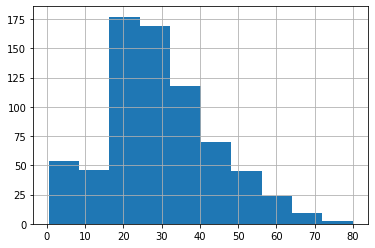

In [71]:
df['Age'].hist()
plt.show()

In [72]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [73]:
df.groupby('Embarked')['Age'].mean()

Embarked
C    30.814769
Q    28.089286
S    29.445397
Name: Age, dtype: float64

Second and third class definitely skew younger than first. The trend isn't as noticeable in port of embarkation, but those who boarded in Cherbourg, France were a bit older.

In [74]:
pd.crosstab(df['Pclass'], df['Embarked'], margins=True, margins_name='Total', normalize='all')

Embarked,C,Q,S,Total
Pclass,,,,
1,0.095613,0.002250,0.142857,0.240720
2,0.019123,0.003375,0.184477,0.206974
3,0.074241,0.080990,0.397075,0.552306
Total,0.188976,0.086614,0.724409,1.000000


64% of all passengers embarked at Southampton, England. Of those, nearly 12% were first class, 18.7% were second class, and a third of the passengers embarking there were in third class.

52% of all passengers traveled in third class.

In [75]:
under18 = df[df['Age']<18]

In [76]:
pd.crosstab(under18['Pclass'], under18['Embarked'], margins=True, margins_name='Total', normalize='all')

Embarked,C,Q,S,Total
Pclass,,,,
1,0.026549,0.000000,0.079646,0.106195
2,0.035398,0.000000,0.168142,0.203540
3,0.150442,0.061947,0.477876,0.690265
Total,0.212389,0.061947,0.725664,1.000000


While 52% of all passengers were in third class, 64% of those under 18 were.